In [1]:
import cv2

In [2]:
import tensorflow as tf

In [3]:
import numpy as np 
from matplotlib import pyplot as plt
import glob
from tensorflow import keras

In [4]:
from PIL import Image

### Extraction of Data

In [5]:
# train_files  = glob.glob("C:/Users/hp/Downloads/__MACOSX/chest_xray/train/*/*")
train_files= glob.glob("C:/Users/hp/Downloads/chest_xray/train/*/*")

In [6]:
test_files = glob.glob("C:/Users/hp/Downloads/chest_xray/test/*/*")

In [7]:
print("Training data size: ",len(train_files))
print("Testing data size: ",len(test_files))

Training data size:  5216
Testing data size:  624


In [8]:
from random import shuffle
shuffle(train_files)
shuffle(test_files)

In [9]:
train_files

['C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1314).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\virus (1185).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (876).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1020).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (2120).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1596).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (2286).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1728).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (2284).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1587).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\virus (928).jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-0673-0001.jpeg',
 'C:/Users/hp/Downloads/chest_xray/train\\PNEUMONIA\\bacteria (1822).jpeg',
 'C:/Users/hp/Down

In [10]:
test_files

['C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (82).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\PNEUMONIA\\bacteria (62).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (145).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (189).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\PNEUMONIA\\bacteria (51).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (68).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (52).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (187).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\PNEUMONIA\\bacteria (173).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\PNEUMONIA\\bacteria (3).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (40).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (118).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\PNEUMONIA\\virus (71).jpeg',
 'C:/Users/hp/Downloads/chest_xray/test\\NORMAL\\Normal (217).jpeg',
 'C:/Users/hp/Downloa

Dimensions of image are:  (576, 976)


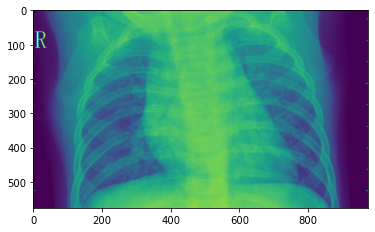

In [11]:
image=Image.open(train_files[1])
img_array = np.array(image)
plt.imshow(image)
size =img_array.shape
print("Dimensions of image are: ",size)

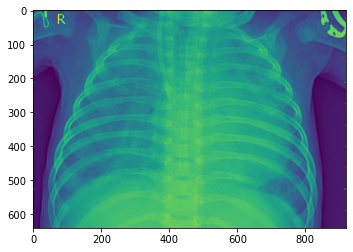

In [12]:
image=Image.open(train_files[6])
img_array = np.array(image)
plt.imshow(image)
# size =img_array.shape
# print("Dimensions of image are: ",size)

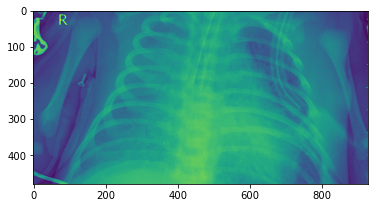

In [13]:
image=Image.open(train_files[4])
img_array = np.array(image)
plt.imshow(image)

### Filtering the Data and Resizing 

In [14]:
# Resizing the dimensions to (128,128)
array_images=[]
for index , img in enumerate(train_files):
    image = Image.open(train_files[index])
    image_arr = np.array(image)
    if(len(image_arr.shape)!=2):
        gray_scale = image.convert('L')
        image_arr=np.array(gray_scale)
#         print(image.sh)
    array_images.append(cv2.resize(image_arr,(128,128),interpolation =cv2.INTER_AREA))
    
array_images_test =[]
for index , img in enumerate(test_files):
    image = Image.open(test_files[index])
    image_arr = np.array(image)
    if(len(image_arr.shape)!=2):
        gray_scale = image.convert('L')
        image_arr=np.array(gray_scale)
    array_images_test.append(cv2.resize(image_arr,(128,128),interpolation =cv2.INTER_AREA))
    

In [15]:
count =0
size = (128,128)  # Required size of input
for index,img in enumerate(array_images):
    dim  = array_images[index].shape
    print(dim)
    if(dim==size):
        count +=1
    
print(count)    

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

In [16]:
len(array_images_test)

624

In [17]:
test_files[1][38]

'P'

In [18]:
len(array_images)

5216

### Labeling Dataset
<ul>
    <li> <b>'0'-> 'Normal'</b></li>
    <li><b> '1'-> 'Virus'</b></li>
    <li><b> '2'-> 'Bacteria'</b></li>
    </ul>

In [19]:
X_train = np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))

for i, item in enumerate(array_images):
        
    X_train[i,:,:] = item
    if('N'==train_files[i][39]):
        Y_train[i]=0
    else:
        if('v'==train_files[i][49]):
            Y_train[i]=1
        else :
            Y_train[i]=2
    
    
    
X_test = np.zeros((len(test_files),128,128))
Y_test=np.zeros((len(test_files),1))

for i, item in enumerate(array_images_test):

    X_test[i,:,:] = item
    if('N'==test_files[i][38]):
        Y_test[i]=0
    else:
        if('v'==test_files[i][48]):
            Y_test[i]=1
        else :
            Y_test[i]=2

In [20]:
# len(array_images[0].shape)
X_train =X_train/255.0
X_test = X_test/255.0

### Model Building and Fitting

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D,Dropout,BatchNormalization


In [22]:
model =Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128, 1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))


In [23]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 128)       5

In [25]:
X_train=X_train.reshape(len(X_train),128,128,1)


In [26]:
X_test = X_test.reshape(len(X_test),128,128,1)

In [27]:
X_test.shape

(624, 128, 128, 1)

In [28]:
X_train.shape

(5216, 128, 128, 1)

In [29]:
Y_test.shape

(624, 1)

In [30]:
EPOCHS= 10
history = model.fit(X_train,Y_train,epochs=EPOCHS,validation_data= (X_test,Y_test),verbose=2)

Epoch 1/10
163/163 - 114s - loss: 1.2225 - accuracy: 0.5709 - val_loss: 1.2108 - val_accuracy: 0.3878
Epoch 2/10
163/163 - 70s - loss: 0.5865 - accuracy: 0.7408 - val_loss: 1.2079 - val_accuracy: 0.3878
Epoch 3/10
163/163 - 79s - loss: 0.5190 - accuracy: 0.7696 - val_loss: 0.9637 - val_accuracy: 0.4920
Epoch 4/10
163/163 - 78s - loss: 0.4979 - accuracy: 0.7816 - val_loss: 0.9601 - val_accuracy: 0.6699
Epoch 5/10
163/163 - 76s - loss: 0.4720 - accuracy: 0.7897 - val_loss: 2.0379 - val_accuracy: 0.5240
Epoch 6/10
163/163 - 77s - loss: 0.4610 - accuracy: 0.7958 - val_loss: 1.0590 - val_accuracy: 0.6619
Epoch 7/10
163/163 - 77s - loss: 0.4459 - accuracy: 0.7975 - val_loss: 1.3675 - val_accuracy: 0.6763
Epoch 8/10
163/163 - 77s - loss: 0.4374 - accuracy: 0.8056 - val_loss: 1.2607 - val_accuracy: 0.6843
Epoch 9/10
163/163 - 77s - loss: 0.4158 - accuracy: 0.8144 - val_loss: 1.0246 - val_accuracy: 0.7404
Epoch 10/10
163/163 - 77s - loss: 0.4258 - accuracy: 0.8054 - val_loss: 1.2623 - val_accur

#### So validation Accuracy comes about 70% while trainin accuracy about 80%
#### Training loss comes about 0.42 while validation loss about 1.26

### Graphs and Comparisons

Text(0.5, 1.0, 'Training and validation loss')

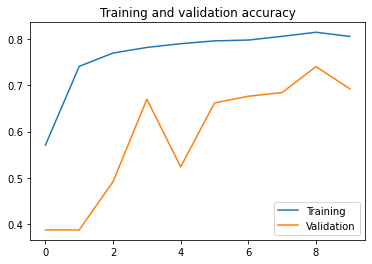

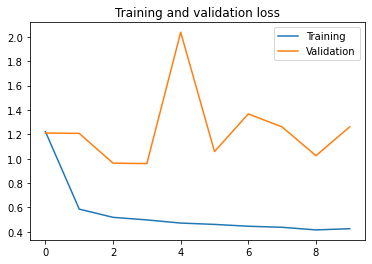

In [31]:
accuracy  = history.history['accuracy']
loss  = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,accuracy ,label= 'Training ')
plt.plot  ( epochs, val_accuracy ,label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,loss,label='Training' )
plt.plot  ( epochs,val_loss ,label='Validation')
plt.legend()
plt.title ('Training and validation loss')


### Have some Fun ,Lets do some prediction with our model

In [32]:
y_predict = model.predict(X_test[50:60])
y_actual = Y_test[50:60]
list=[]
for i in range(y_predict.shape[0]):
    max_index =-1
    max_val=1.0
    if(y_predict[i][0]>y_predict[i][1]):
        max_index=0
        max_val=y_predict[i][0]
    else :
        max_index=1
        max_val = y_predict[i][1]
              
    if(max_val<y_predict[i][2]):
        max_index =2
        
    list.append(max_index)
    
list = np.array(list)    
print(list)    
    

[2 2 2 2 2 2 2 0 2 2]


In [33]:
y_actual

array([[2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.]])

### Getting correct 8 out of 10  in random samples



